### This script explores the analytical solutions for the relationship between flux and slope based on different transport models in the landscape evolution literature

Based on Matlab script by R. Arrowsmith, modified by A.M. Rodriguez Padilla and M. Zuckermann

In [32]:
# first, import python packages 
import numpy as np
import matplotlib.pyplot as plt

#### Transport laws considered

Di Michieli Vitturi and Arrowsmith (2013)

$$
qs = \frac{k \cdot dh}{\left(1 - \frac{dh}{sc}\right)^n}
$$

Ganti et al. (2013)

$$
qs = k \cdot dh + \left(\frac{k}{sc^2}\right) \cdot dh^3
$$

Andrews and Hanks (1985)

$$
qs = k \frac{dh}{1 - \left(\frac{ dh}{sc}\right)^2}
$$

Linear diffusion:

$$
qs = k \cdot dh
$$

| Parameter | Description              | Units        |
|-----------|--------------------------|--------------|
|  qs  | Soil flux | $\frac{}{m}$ |
|  k  | Diffusivity  | $\frac{1}{m^2}$  |
|  dh   | Slope | - |
|  sc   | Critical slope       | - |
|  n    | Exponent   | -   |


In [33]:
# user-defined parameters 
k=1; # diffusivity 1/m^2
sc=0.65; # critical slope 
dh = np.linspace(0,sc,1000) # slope
dh_ganti = np.linspace(0,1.5,1000) # slope (extending beyond critical slope for Ganti implementation)

In [34]:
def Xu_nonlinear(k,dh,sc,n=2):
    '''Estimate soil flux as function of slope using the Xu et al. () solution'''
    qs=(k*dh)/((1-dh/sc)**n) 
    return qs

def Ganti_nonlinear(k,dh,sc):
    '''Estimate soil flux as function of slope using the Ganti et al. () solution'''
    qs = k*dh + ((k/sc**2)*dh**3) 
    return qs

def linear(k,dh):
    '''Estimate soil flux as function of slope under the assumption of linear diffusion'''
    qs = k*dh
    return qs
    

### Visualize solutions for different transport laws

/var/folders/kg/j5ms0y1x28l_gm2jtsf5j4pr0000gn/T/ipykernel_16020/480361283.py:2: RuntimeWarning: divide by zero encountered in divide
  qs=(k*dh)/((1-dh/sc)**n) # flux 1/m


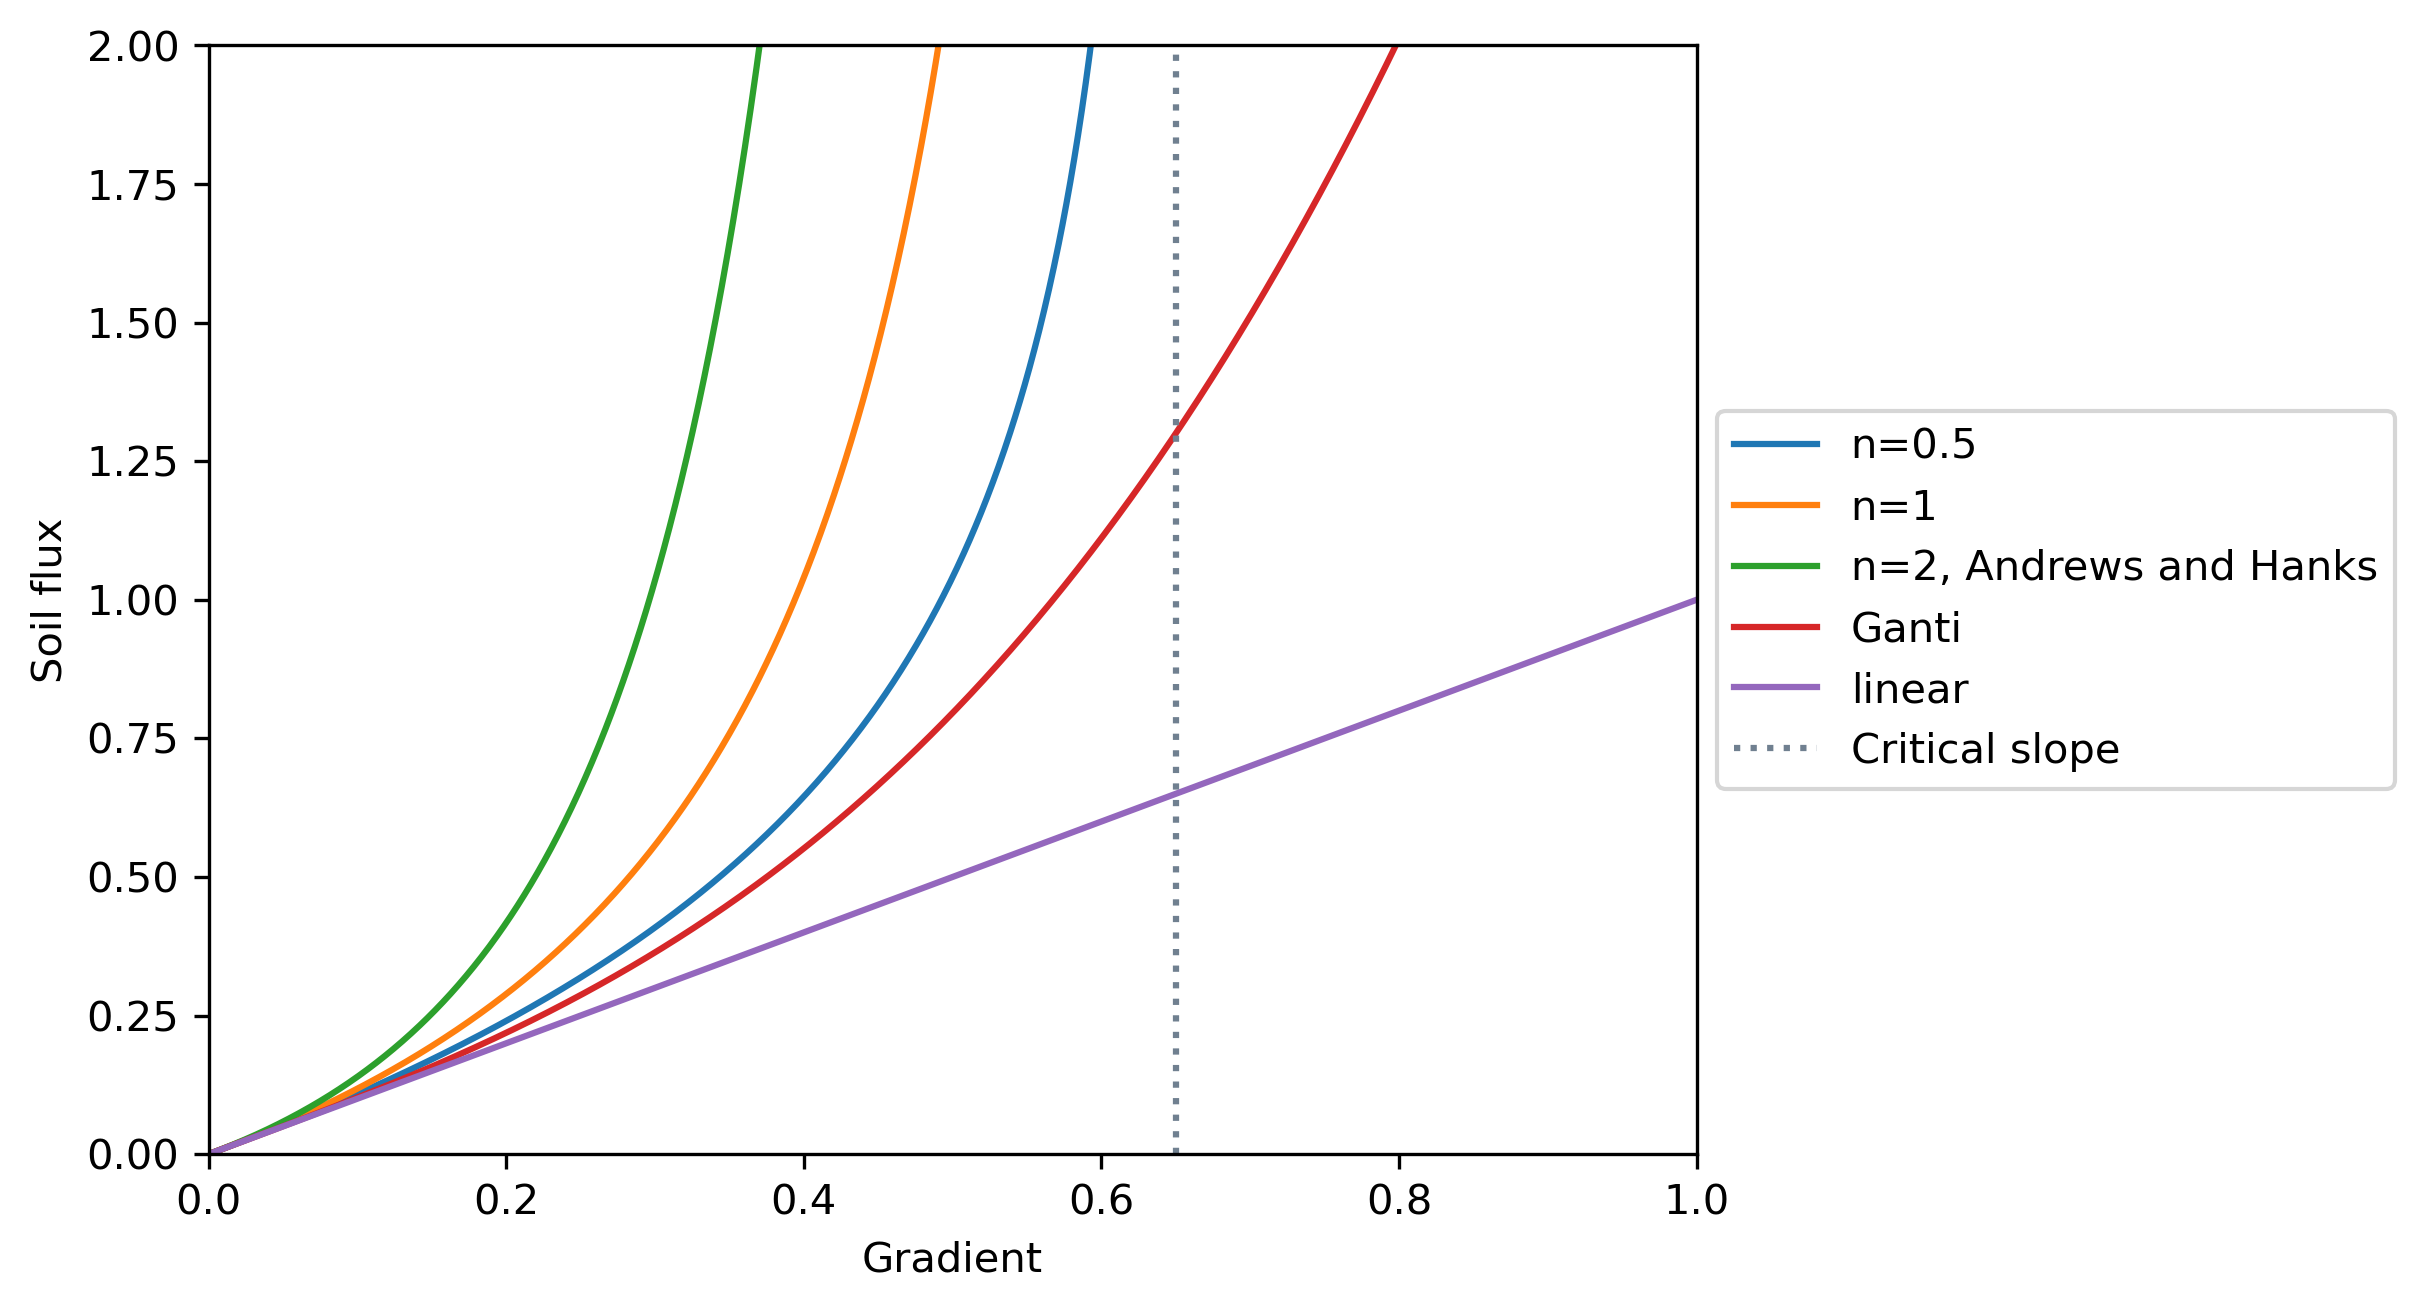

In [37]:
plt.figure(dpi=300)
plt.plot(dh, Xu_nonlinear(k,dh,sc,0.5),label='n=0.5')
plt.plot(dh, Xu_nonlinear(k,dh,sc,1),label='n=1')
plt.plot(dh, Xu_nonlinear(k,dh,sc,2),label='n=2, Andrews and Hanks')
plt.plot(dh_ganti, Ganti_nonlinear(k,dh_ganti,sc),label='Ganti')
plt.plot(dh_ganti,linear(k,dh_ganti),label='linear')
plt.xlabel('Gradient')
plt.ylabel('Soil flux')
plt.axvline(sc,linestyle=':',c='slategray',label='Critical slope')
plt.ylim(0,2)
plt.xlim(0,1)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))